<a href="https://colab.research.google.com/github/ricecakeblack/myRepoTest/blob/main/factCheckProject_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 주제 : 데이터를 이용한 팩트 체크
---

#### 질문 : 과연 데이터를 사용하여 위 내용을 입증 할 수 있을까요?

> ##### 체크할 내용 1 : 몽골에서의 한국 위상이 높아 지고 있다고 합니다. 한국의 편의점 문화와 이마트 등이 몽골인들에게 익숙해 지고 있습니다. 그 이유는 외부 활동을 할 수 없는 몽골의 혹독한 겨울에, 한국으로 놀러온 몽골인들이 편의점 알바와 이사짐 센터 알바등을 하며 한국 문화를 체험하고 고국으로 돌아 갔기 때문이라고 합니다.

>#### 필요 데이터 :
1. 최근 국내에 출입국한 몽골인의 수.
2. 위 해당 월에 몽골인이 취업한 수


>#### 결과 :
국내 출입국 외국인 수를 확인하고 그 안에 몽골인의 데이터를 확인 할 수 있었음. 하지만 몽골인의 국내 취업한 데이터를 찾기가 어려움

---
#### 체크할 내용 2 : "외국인 노동자가 내국인 일자리를 빼앗고 있나 [팩트체크K]" 중의 기사 내용 발췌 (https://news.kbs.co.kr/news/pc/view/view.do?ncd=7691013)
---
#### 질문 : KBS의 뉴스 기사 중에 해당 통계 데이터를 확인하여 검증할 수 있는가?


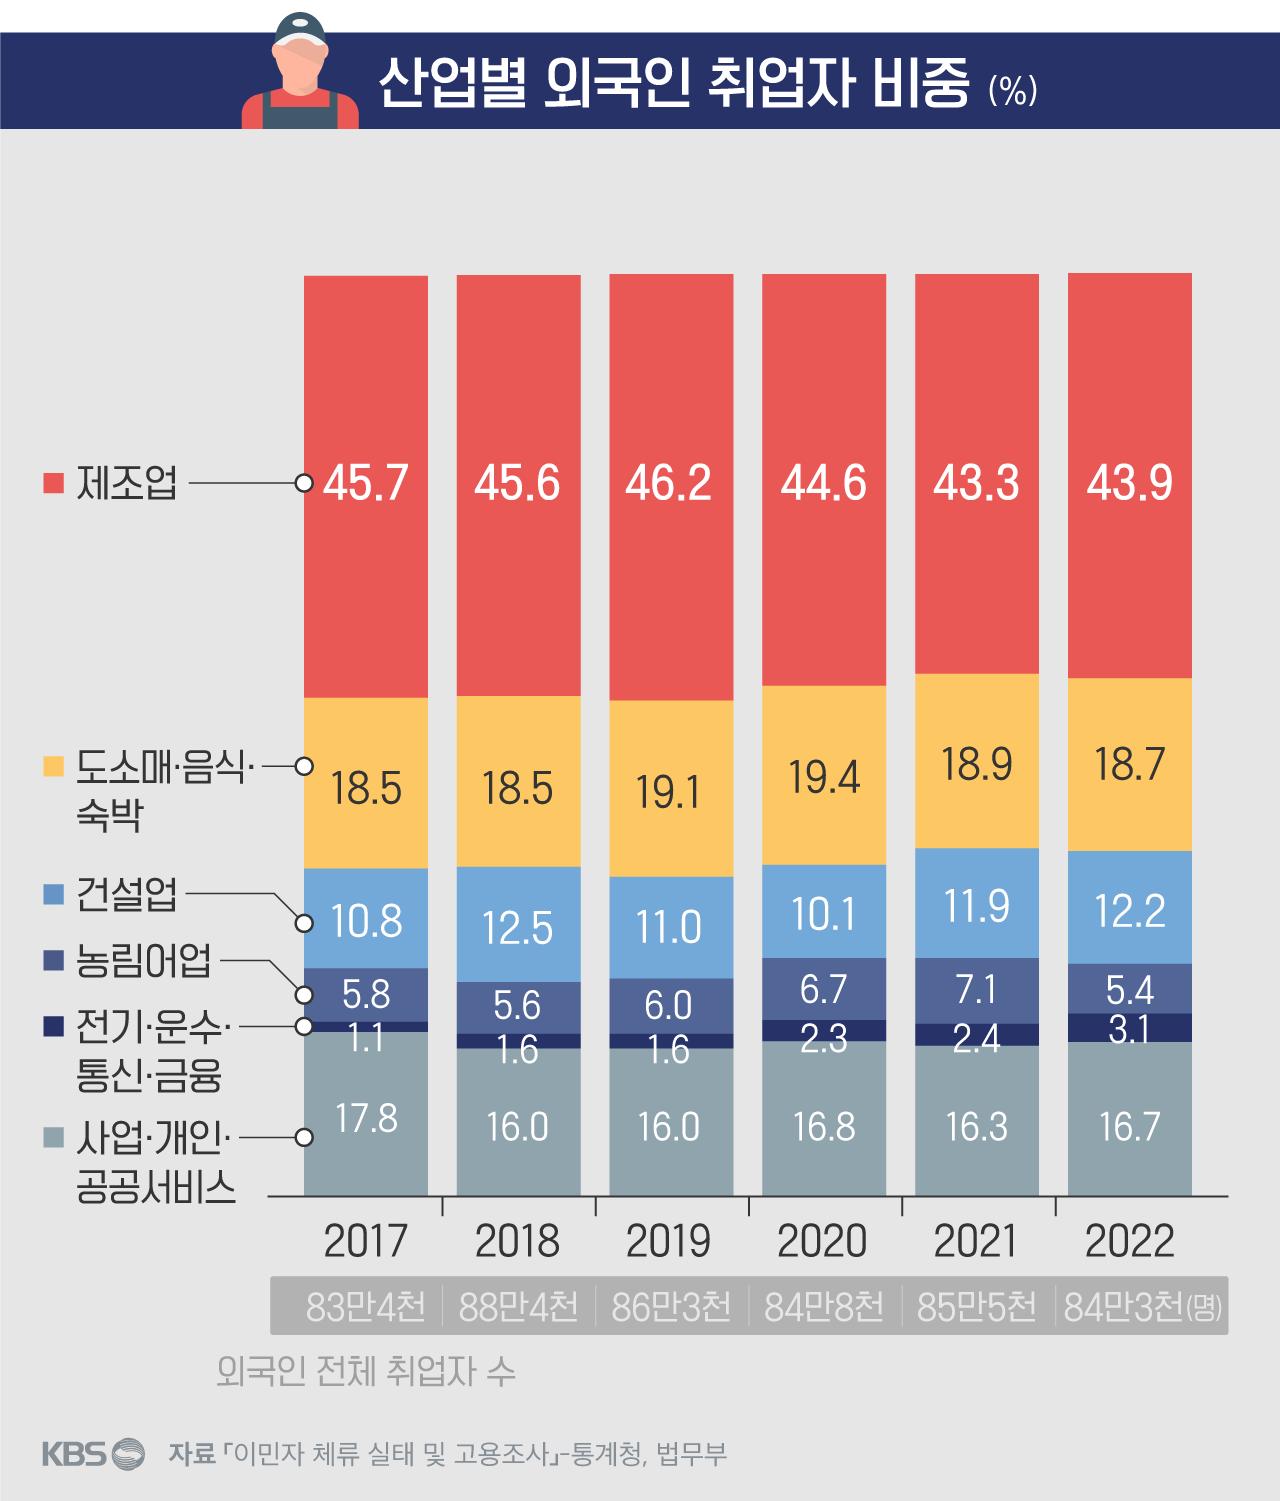

 ### 필요 데이터
>"이민자 체류 실태 및 고용조사" - (통계청, 법무부) 의 실제 csv 혹은 xls 파일<br>
1.1. 통계청에서 해당 보고서를 hwp 파일 형태로 입수<br>
1.2. 실 데이터를 확인하기 위해 KOSIS (국가통계포털) 에서 "고용 | 규모" 로 검색하여 데이터를 확인
>
#### 찾은 데이터
>#### 산업별 외국인 취업자 비중 차트<br>
> - 산업별취업자이민자10차20231018150816.csv<br>
>- 경제활동인구총괄이민자__20231018150755.csv<br>
>
>#### 종사자 규모별 분포 차트<br>
- 규모연령계층임금계층총액__성별근로자수및근로시간_20231018150948.csv



In [ ]:
# Python Version : 3.9.18
# Pandas Version : 2.1.1
# Matplotlib Version : 3.8.0
# Created: OCT. 18. 2023
# Author: D.W. SHIN

import platform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sysOS = platform.system()

if sysOS == 'Windows':
    # Windows 일 경우
    plt.rcParams['font.family'] ='Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] =False
elif sysOS == 'Darwin':
    # Mac일 경우
    plt.rcParams['font.family'] ='AppleGothic'
    plt.rcParams['axes.unicode_minus'] =False
else:
    print('Please check your Korean font!!')
    !sudo apt-get install -y fonts-nanum
    !sudo fc-cache -fv
    !rm ~/.cache/matplotlib -rf
    print('#' * 30)
    print('#' * 30)
    print('런타임을 다시 시작해 주세요~~~')
    print('#' * 30)
    print('#' * 30)


Please check your Korean font!!
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory det

In [ ]:
try:
  sysOS
except NameError:
  import platform
  import pandas as pd
  import matplotlib.pyplot as plt
  %matplotlib inline
else:
  print("Keep going~!")

sysOS = platform.system()

cvsPath =''

if sysOS == 'Linux':
  plt.rc('font', family='NanumBarunGothic')
  from google.colab import drive
  drive.mount('/content/drive')
  cvsPath = '/content/drive/MyDrive/구글클라우드/수업(코드)/Pandas/WS/Industry_Employed_Immigrants_10th_20231018150816.csv'
else:
  cvsPath = '../data/Industry_Employed_Immigrants_10th_20231018150816.csv'



Keep going~!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### CSV 특이사항
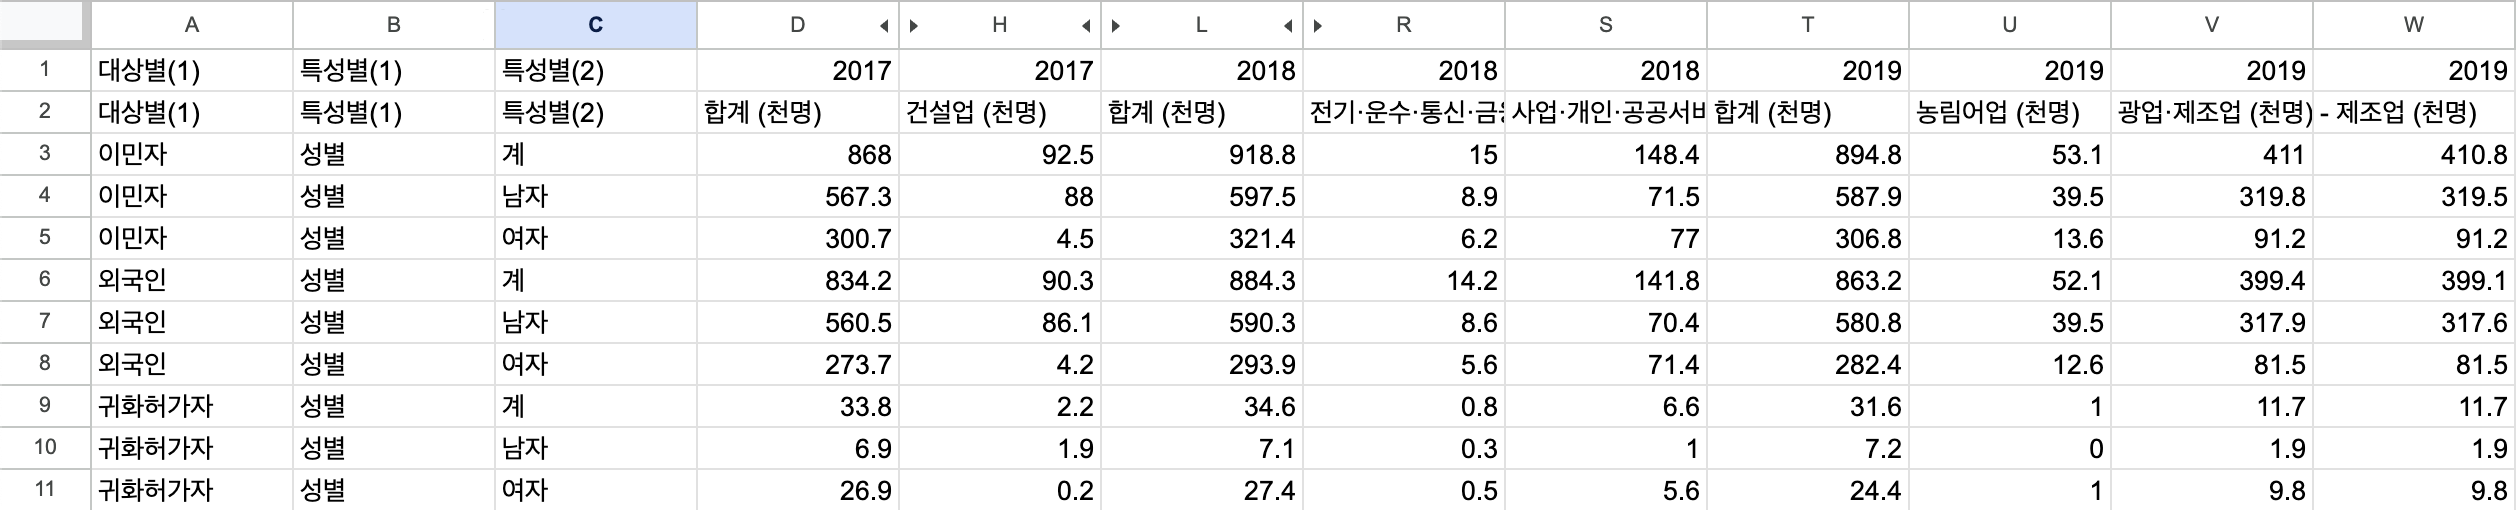
> ### header 멀티컬럼
- #### 년도별 수량을 알아보기가 어려움. header 옵션을 통해 컬럼 선택 부분을 확인.<br>

> ### skipinitialspace <br>
>#### 컬럼명의 빈 공백을 없애는 옵션: 텍스트 정렬로 공백 사용. 그 공백을 지우기 위해서 옵션 사용


In [ ]:
df1 = pd.read_csv(cvsPath, encoding='euc-kr', header=[0,1], skipinitialspace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (대상별(1), 대상별(1))          9 non-null      object 
 1   (특성별(1), 특성별(1))          9 non-null      object 
 2   (특성별(2), 특성별(2))          9 non-null      object 
 3   (2017, 합계 (천명))           9 non-null      float64
 4   (2017, 농림어업 (천명))         9 non-null      float64
 5   (2017, 광업·제조업 (천명))       9 non-null      float64
 6   (2017, - 제조업 (천명))        9 non-null      float64
 7   (2017, 건설업 (천명))          9 non-null      float64
 8   (2017, 도소매·음식·숙박 (천명))    9 non-null      float64
 9   (2017, 전기·운수·통신·금융 (천명))  9 non-null      float64
 10  (2017, 사업·개인·공공서비스 (천명))  9 non-null      float64
 11  (2018, 합계 (천명))           9 non-null      float64
 12  (2018, 농림어업 (천명))         9 non-null      float64
 13  (2018, 광업·제조업 (천명))       9 non-null      float64
 14  (2018, - 제조업 (

In [ ]:
df1.head()

대상별(1) 특성별(1) 특성별(2)    2017                                            \
  대상별(1) 특성별(1) 특성별(2) 합계 (천명) 농림어업 (천명) 광업·제조업 (천명) - 제조업 (천명) 건설업 (천명)   
0    이민자     성별      계   868.0      50.0       396.6      395.3     92.5   
1    이민자     성별     남자   567.3      33.7       311.7      310.4     88.0   
2    이민자     성별     여자   300.7      16.3        84.9       84.9      4.5   
3    외국인     성별      계   834.2      48.3       383.5      382.3     90.3   
4    외국인     성별     남자   560.5      33.6       309.7      308.5     86.1   

                                   ...             2021                   \
  도소매·음식·숙박 (천명) 전기·운수·통신·금융 (천명)  ... 전기·운수·통신·금융 (천명) 사업·개인·공공서비스 (천명)   
0          165.0             10.2  ...             22.0            145.0   
1           48.4              6.7  ...             14.7             68.1   
2          116.6              3.5  ...              7.4             77.0   
3          154.7              9.5  ...             20.7            139.6   
4           47.0              6.5  ...             14.2             66.9   

     2022                                                           \
  합계 (천명) 농림어업 (천명) 광업·제조업 (천명) - 제조업 (천명) 건설업 (천명) 도소매·음식·숙박 (천명)   
0   877.2      47.1       383.4      383.1    105.3          166.9   
1   565.8      33.5       286.2      285.9     97.2           60.5   
2   311.4      13.6        97.2       97.2      8.2          106.4   
3   843.0      45.8       370.3      370.1    102.6          157.3   
4   558.6      33.5       284.4      284.1     95.1           58.9   

                                     
  전기·운수·통신·금융 (천명) 사업·개인·공공서비스 (천명)  
0             27.0            147.5  
1             17.6             70.8  
2              9.3             76.7  
3             25.8            141.2  
4             17.2             69.6  

[5 rows x 51 columns]

### 산업별 외국인 취업자 비중

In [ ]:
df1.loc[3, :]

대상별(1)  대상별(1)                외국인
특성별(1)  특성별(1)                 성별
특성별(2)  특성별(2)                  계
2017    합계 (천명)             834.2
        농림어업 (천명)            48.3
        광업·제조업 (천명)         383.5
        - 제조업 (천명)          382.3
        건설업 (천명)             90.3
        도소매·음식·숙박 (천명)      154.7
        전기·운수·통신·금융 (천명)      9.5
        사업·개인·공공서비스 (천명)    147.7
2018    합계 (천명)             884.3
        농림어업 (천명)            49.5
        광업·제조업 (천명)         404.9
        - 제조업 (천명)          403.3
        건설업 (천명)            110.7
        도소매·음식·숙박 (천명)      163.2
        전기·운수·통신·금융 (천명)     14.2
        사업·개인·공공서비스 (천명)    141.8
2019    합계 (천명)             863.2
        농림어업 (천명)            52.1
        광업·제조업 (천명)         399.4
        - 제조업 (천명)          399.1
        건설업 (천명)             95.0
        도소매·음식·숙박 (천명)      164.5
        전기·운수·통신·금융 (천명)     14.0
        사업·개인·공공서비스 (천명)    138.3
2020    합계 (천명)             847.9
        농림어업 (천명)            56.9
        광업·제조업

In [ ]:
ps = df1.iloc[3, :]

In [ ]:
ps.info()

<class 'pandas.core.series.Series'>
MultiIndex: 51 entries, ('대상별(1)', '대상별(1)') to ('2022', '사업·개인·공공서비스 (천명)')
Series name: 3
Non-Null Count  Dtype 
--------------  ----- 
51 non-null     object
dtypes: object(1)
memory usage: 3.3+ KB


### 데이터프레임으로 만들기

In [ ]:
df2 = pd.DataFrame(ps)
df2

3
대상별(1) 대상별(1)              외국인
특성별(1) 특성별(1)               성별
특성별(2) 특성별(2)                계
2017   합계 (천명)           834.2
       농림어업 (천명)          48.3
       광업·제조업 (천명)       383.5
       - 제조업 (천명)        382.3
       건설업 (천명)           90.3
       도소매·음식·숙박 (천명)    154.7
       전기·운수·통신·금융 (천명)    9.5
       사업·개인·공공서비스 (천명)  147.7
2018   합계 (천명)           884.3
       농림어업 (천명)          49.5
       광업·제조업 (천명)       404.9
       - 제조업 (천명)        403.3
       건설업 (천명)          110.7
       도소매·음식·숙박 (천명)    163.2
       전기·운수·통신·금융 (천명)   14.2
       사업·개인·공공서비스 (천명)  141.8
2019   합계 (천명)           863.2
       농림어업 (천명)          52.1
       광업·제조업 (천명)       399.4
       - 제조업 (천명)        399.1
       건설업 (천명)           95.0
       도소매·음식·숙박 (천명)    164.5
       전기·운수·통신·금융 (천명)   14.0
       사업·개인·공공서비스 (천명)  138.3
2020   합계 (천명)           847.9
       농림어업 (천명)          56.9
       광업·제조업 (천명)       379.6
       - 제조업 (천명)        377.8
       건설업 (천명)           85.5
       도소매·음식·숙박 (천명)    164.4
       전기·운수·통신·금융 (천명)   19.2
       사업·개인·공공서비스 (천명)  142.3
2021   합계 (천명)           855.3
       농림어업 (천명)          61.0
       광업·제조업 (천명)       370.4
       - 제조업 (천명)        368.7
       건설업 (천명)          102.1
       도소매·음식·숙박 (천명)    161.6
       전기·운수·통신·금융 (천명)   20.7
       사업·개인·공공서비스 (천명)  139.6
2022   합계 (천명)           843.0
       농림어업 (천명)          45.8
       광업·제조업 (천명)       370.3
       - 제조업 (천명)        370.1
       건설업 (천명)          102.6
       도소매·음식·숙박 (천명)    157.3
       전기·운수·통신·금융 (천명)   25.8
       사업·개인·공공서비스 (천명)  141.2

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 51 entries, ('대상별(1)', '대상별(1)') to ('2022', '사업·개인·공공서비스 (천명)')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   3       51 non-null     object
dtypes: object(1)
memory usage: 3.3+ KB


In [ ]:
df2.index

MultiIndex([('대상별(1)',           '대상별(1)'),
            ('특성별(1)',           '특성별(1)'),
            ('특성별(2)',           '특성별(2)'),
            (  '2017',          '합계 (천명)'),
            (  '2017',        '농림어업 (천명)'),
            (  '2017',      '광업·제조업 (천명)'),
            (  '2017',       '- 제조업 (천명)'),
            (  '2017',         '건설업 (천명)'),
            (  '2017',   '도소매·음식·숙박 (천명)'),
            (  '2017', '전기·운수·통신·금융 (천명)'),
            (  '2017', '사업·개인·공공서비스 (천명)'),
            (  '2018',          '합계 (천명)'),
            (  '2018',        '농림어업 (천명)'),
            (  '2018',      '광업·제조업 (천명)'),
            (  '2018',       '- 제조업 (천명)'),
            (  '2018',         '건설업 (천명)'),
            (  '2018',   '도소매·음식·숙박 (천명)'),
            (  '2018', '전기·운수·통신·금융 (천명)'),
            (  '2018', '사업·개인·공공서비스 (천명)'),
            (  '2019',          '합계 (천명)'),
            (  '2019',        '농림어업 (천명)'),
            (  '2019',      '광업·제조업 (천명)'),
            (  '2019',       '- 

In [ ]:
df2.columns

Int64Index([3], dtype='int64')

In [ ]:
df2.drop([('대상별(1)',           '대상별(1)'),
          ('특성별(1)',           '특성별(1)'),
          ('특성별(2)',           '특성별(2)')], axis=0, inplace=True)

In [ ]:
df2.head(10)

3
2017 합계 (천명)           834.2
     농림어업 (천명)          48.3
     광업·제조업 (천명)       383.5
     - 제조업 (천명)        382.3
     건설업 (천명)           90.3
     도소매·음식·숙박 (천명)    154.7
     전기·운수·통신·금융 (천명)    9.5
     사업·개인·공공서비스 (천명)  147.7
2018 합계 (천명)           884.3
     농림어업 (천명)          49.5

In [ ]:
df2 = df2.reset_index()

In [ ]:
df2.head()

,level_0,level_1,3
0,2017,합계 (천명),834.2
1,2017,농림어업 (천명),48.3
2,2017,광업·제조업 (천명),383.5
3,2017,- 제조업 (천명),382.3
4,2017,건설업 (천명),90.3


In [ ]:
df2.columns = ['연도', '목록', '외국인근로총합계']

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연도        48 non-null     object
 1   목록        48 non-null     object
 2   외국인근로총합계  48 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


### to_numeric 옵션으로 외국인 근로 총 합계 타입 바꾸기(object -> float)

In [ ]:
# df2['외국인근로총합계'].astype(float)
df2['외국인근로총합계'] = pd.to_numeric(df2['외국인근로총합계'], errors='coerce')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도        48 non-null     object 
 1   목록        48 non-null     object 
 2   외국인근로총합계  48 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [ ]:
df2.head()

,연도,목록,외국인근로총합계
0,2017,합계 (천명),834.2
1,2017,농림어업 (천명),48.3
2,2017,광업·제조업 (천명),383.5
3,2017,- 제조업 (천명),382.3
4,2017,건설업 (천명),90.3


### pivot으로 데이터프레임 재구성

In [ ]:
pivot_df = df2.pivot(index='연도', columns='목록', values='외국인근로총합계')
pivot_df

목록,- 제조업 (천명),건설업 (천명),광업·제조업 (천명),농림어업 (천명),도소매·음식·숙박 (천명),사업·개인·공공서비스 (천명),전기·운수·통신·금융 (천명),합계 (천명)
연도,,,,,,,,
2017,382.3,90.3,383.5,48.3,154.7,147.7,9.5,834.2
2018,403.3,110.7,404.9,49.5,163.2,141.8,14.2,884.3
2019,399.1,95.0,399.4,52.1,164.5,138.3,14.0,863.2
2020,377.8,85.5,379.6,56.9,164.4,142.3,19.2,847.9
2021,368.7,102.1,370.4,61.0,161.6,139.6,20.7,855.3
2022,370.1,102.6,370.3,45.8,157.3,141.2,25.8,843.0


In [ ]:
pivot_df = pivot_df.reset_index()

In [ ]:
pivot_df.index

RangeIndex(start=0, stop=6, step=1)

In [ ]:
pivot_df.columns

Index(['연도', '- 제조업 (천명)', '건설업 (천명)', '광업·제조업 (천명)', '농림어업 (천명)',
       '도소매·음식·숙박 (천명)', '사업·개인·공공서비스 (천명)', '전기·운수·통신·금융 (천명)', '합계 (천명)'],
      dtype='object', name='목록')

### '광업.제조업(천명)'에 포함 되어있는 '- 제조업(천명)' 빼주기

In [ ]:
chart_base = pivot_df.drop('- 제조업 (천명)', axis=1)
chart_base

목록,연도,건설업 (천명),광업·제조업 (천명),농림어업 (천명),도소매·음식·숙박 (천명),사업·개인·공공서비스 (천명),전기·운수·통신·금융 (천명),합계 (천명)
0,2017,90.3,383.5,48.3,154.7,147.7,9.5,834.2
1,2018,110.7,404.9,49.5,163.2,141.8,14.2,884.3
2,2019,95.0,399.4,52.1,164.5,138.3,14.0,863.2
3,2020,85.5,379.6,56.9,164.4,142.3,19.2,847.9
4,2021,102.1,370.4,61.0,161.6,139.6,20.7,855.3
5,2022,102.6,370.3,45.8,157.3,141.2,25.8,843.0


In [ ]:
chart_base['total'] = chart_base.iloc[:, 1:7].sum(axis=1)

## 총 비율(백분율)로 맞추기 위한 새로운 컬럼 추가

In [ ]:
chart_base['건설업 (천명)P'] = round(chart_base['건설업 (천명)'] / chart_base['total'] * 100, 2)
chart_base['광업·제조업 (천명)P'] = round(chart_base['광업·제조업 (천명)'] / chart_base['total'] * 100, 2)
chart_base['농림어업 (천명)P'] = round(chart_base['농림어업 (천명)'] / chart_base['total'] * 100, 2)
chart_base['도소매·음식·숙박 (천명)P'] = round(chart_base['도소매·음식·숙박 (천명)'] / chart_base['total'] * 100, 2)
chart_base['사업·개인·공공서비스 (천명)P'] = round(chart_base['사업·개인·공공서비스 (천명)'] / chart_base['total'] * 100, 2)
chart_base['전기·운수·통신·금융 (천명)P'] = round(chart_base['전기·운수·통신·금융 (천명)'] / chart_base['total'] * 100, 2)

In [ ]:
chart_base

목록,연도,건설업 (천명),광업·제조업 (천명),농림어업 (천명),도소매·음식·숙박 (천명),사업·개인·공공서비스 (천명),전기·운수·통신·금융 (천명),합계 (천명),total,건설업 (천명)P,광업·제조업 (천명)P,농림어업 (천명)P,도소매·음식·숙박 (천명)P,사업·개인·공공서비스 (천명)P,전기·운수·통신·금융 (천명)P
0,2017,90.3,383.5,48.3,154.7,147.7,9.5,834.2,834.0,10.83,45.98,5.79,18.55,17.71,1.14
1,2018,110.7,404.9,49.5,163.2,141.8,14.2,884.3,884.3,12.52,45.79,5.60,18.46,16.04,1.61
2,2019,95.0,399.4,52.1,164.5,138.3,14.0,863.2,863.3,11.00,46.26,6.03,19.05,16.02,1.62
3,2020,85.5,379.6,56.9,164.4,142.3,19.2,847.9,847.9,10.08,44.77,6.71,19.39,16.78,2.26
4,2021,102.1,370.4,61.0,161.6,139.6,20.7,855.3,855.4,11.94,43.30,7.13,18.89,16.32,2.42
5,2022,102.6,370.3,45.8,157.3,141.2,25.8,843.0,843.0,12.17,43.93,5.43,18.66,16.75,3.06


In [ ]:
#총 합이 100이 되는지 확인
chart_base['total_p'] = chart_base.iloc[:, 9:15].sum(axis=1)

In [ ]:
chart_base

목록,연도,건설업 (천명),광업·제조업 (천명),농림어업 (천명),도소매·음식·숙박 (천명),사업·개인·공공서비스 (천명),전기·운수·통신·금융 (천명),합계 (천명),total,건설업 (천명)P,광업·제조업 (천명)P,농림어업 (천명)P,도소매·음식·숙박 (천명)P,사업·개인·공공서비스 (천명)P,전기·운수·통신·금융 (천명)P,total_p
0,2017,90.3,383.5,48.3,154.7,147.7,9.5,834.2,834.0,10.83,45.98,5.79,18.55,17.71,1.14,100.00
1,2018,110.7,404.9,49.5,163.2,141.8,14.2,884.3,884.3,12.52,45.79,5.60,18.46,16.04,1.61,100.02
2,2019,95.0,399.4,52.1,164.5,138.3,14.0,863.2,863.3,11.00,46.26,6.03,19.05,16.02,1.62,99.98
3,2020,85.5,379.6,56.9,164.4,142.3,19.2,847.9,847.9,10.08,44.77,6.71,19.39,16.78,2.26,99.99
4,2021,102.1,370.4,61.0,161.6,139.6,20.7,855.3,855.4,11.94,43.30,7.13,18.89,16.32,2.42,100.00
5,2022,102.6,370.3,45.8,157.3,141.2,25.8,843.0,843.0,12.17,43.93,5.43,18.66,16.75,3.06,100.00


In [ ]:
chart_base.head()

목록,연도,건설업 (천명),광업·제조업 (천명),농림어업 (천명),도소매·음식·숙박 (천명),사업·개인·공공서비스 (천명),전기·운수·통신·금융 (천명),합계 (천명),total,건설업 (천명)P,광업·제조업 (천명)P,농림어업 (천명)P,도소매·음식·숙박 (천명)P,사업·개인·공공서비스 (천명)P,전기·운수·통신·금융 (천명)P,total_p
0,2017,90.3,383.5,48.3,154.7,147.7,9.5,834.2,834.0,10.83,45.98,5.79,18.55,17.71,1.14,100.00
1,2018,110.7,404.9,49.5,163.2,141.8,14.2,884.3,884.3,12.52,45.79,5.60,18.46,16.04,1.61,100.02
2,2019,95.0,399.4,52.1,164.5,138.3,14.0,863.2,863.3,11.00,46.26,6.03,19.05,16.02,1.62,99.98
3,2020,85.5,379.6,56.9,164.4,142.3,19.2,847.9,847.9,10.08,44.77,6.71,19.39,16.78,2.26,99.99
4,2021,102.1,370.4,61.0,161.6,139.6,20.7,855.3,855.4,11.94,43.30,7.13,18.89,16.32,2.42,100.00


### 백분율 차트를 그리기 위한 새로운 테이블 생성


- 바 차트의 크기는 동일하나, 비율은 다르게 표현하기 위함.

In [ ]:
my_df = chart_base.iloc[:,[0, 9,10,11,12,13,14]]

my_df.set_index(my_df['연도'], inplace=True)

my_df.drop('연도', axis=1)

목록,건설업 (천명)P,광업·제조업 (천명)P,농림어업 (천명)P,도소매·음식·숙박 (천명)P,사업·개인·공공서비스 (천명)P,전기·운수·통신·금융 (천명)P
연도,,,,,,
2017,10.83,45.98,5.79,18.55,17.71,1.14
2018,12.52,45.79,5.60,18.46,16.04,1.61
2019,11.00,46.26,6.03,19.05,16.02,1.62
2020,10.08,44.77,6.71,19.39,16.78,2.26
2021,11.94,43.30,7.13,18.89,16.32,2.42
2022,12.17,43.93,5.43,18.66,16.75,3.06


>### 누적 바 차트 그리기
>### 'stacked = True'로 누적 바 차트 생성
> 한계점: 그래프에 퍼센터이지가 들어가지 않음

<Figure size 700x700 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

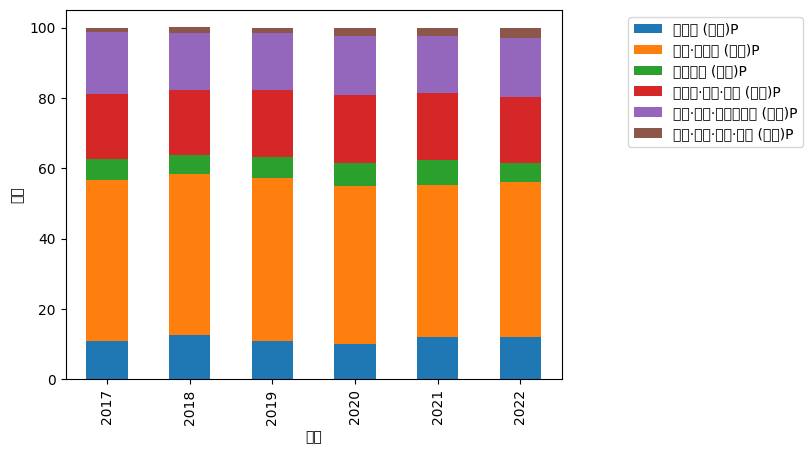

In [ ]:
plt.figure(figsize=(7,7))

my_df.plot(kind='bar', stacked=True)

plt.xlabel('연도', fontsize = 10)
plt.ylabel('목록', fontsize = 10)

plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1.0))
plt.show()

### 그외 차트 1
-  바 그래프 색깔 표현이 잘 되지 않음,
오픈소스 오류로 추정됨

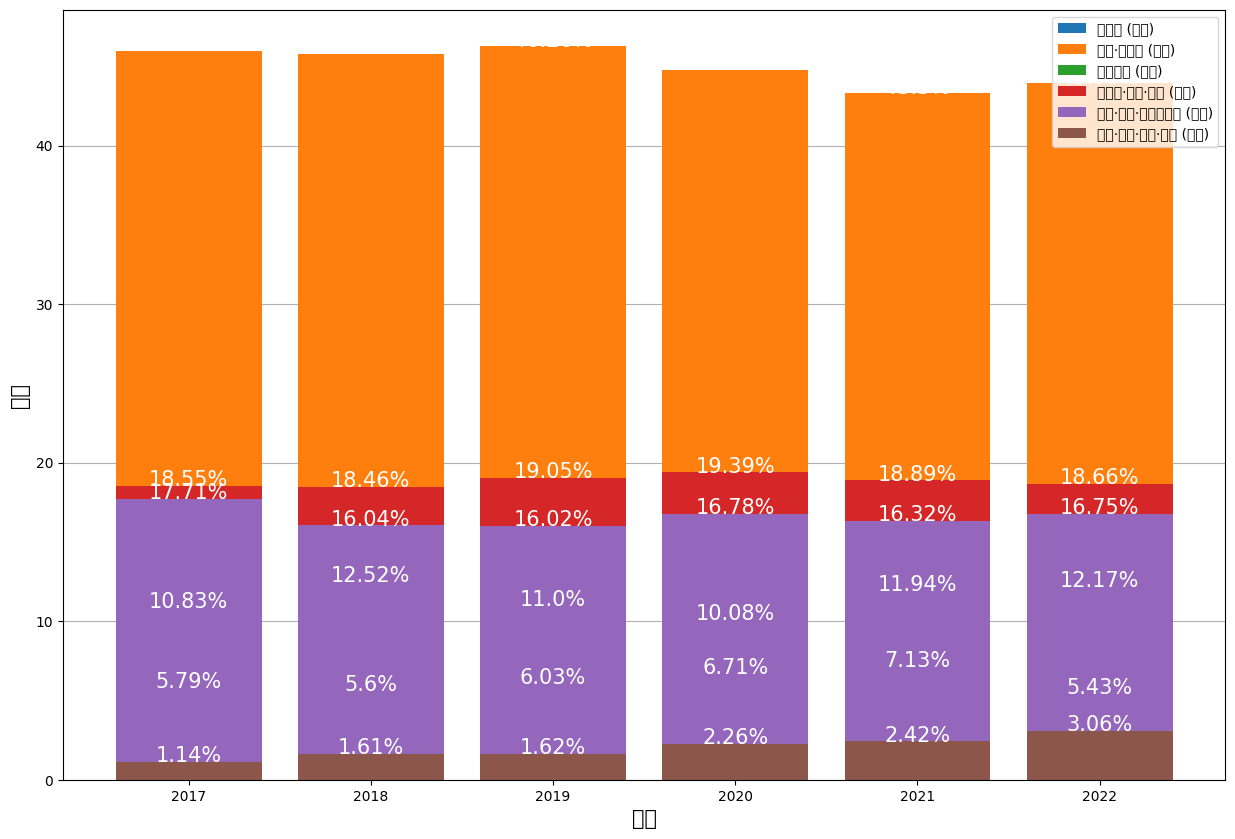

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax.set_axisbelow(True)
ax.grid(True, axis='y')

ax.bar(chart_base['연도'], chart_base['건설업 (천명)P'], label = '건설업 (천명)')
ax.bar(chart_base['연도'], chart_base['광업·제조업 (천명)P'], label = '광업·제조업 (천명)')
ax.bar(chart_base['연도'], chart_base['농림어업 (천명)P'], label = '농림어업 (천명)')
ax.bar(chart_base['연도'], chart_base['도소매·음식·숙박 (천명)P'], label = '도소매·음식·숙박 (천명)')
ax.bar(chart_base['연도'], chart_base['사업·개인·공공서비스 (천명)P'], label = '사업·개인·공공서비스 (천명)')
ax.bar(chart_base['연도'], chart_base['전기·운수·통신·금융 (천명)P'], label = '전기·운수·통신·금융 (천명)')

ax.set_xlabel('연도', fontsize = 15)
ax.set_ylabel('목록', fontsize = 15)

ax.tick_params(axis= 'x')
ax.tick_params(axis= 'y')

ax.legend()

for i in range(len(chart_base['연도'])):
    ax.text(chart_base['연도'][i], chart_base['건설업 (천명)P'][i], str(chart_base['건설업 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')
    ax.text(chart_base['연도'][i], chart_base['광업·제조업 (천명)P'][i], str(chart_base['광업·제조업 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')
    ax.text(chart_base['연도'][i], chart_base['농림어업 (천명)P'][i], str(chart_base['농림어업 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')
    ax.text(chart_base['연도'][i], chart_base['도소매·음식·숙박 (천명)P'][i], str(chart_base['도소매·음식·숙박 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')
    ax.text(chart_base['연도'][i], chart_base['사업·개인·공공서비스 (천명)P'][i], str(chart_base['사업·개인·공공서비스 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')
    ax.text(chart_base['연도'][i], chart_base['전기·운수·통신·금융 (천명)P'][i], str(chart_base['전기·운수·통신·금융 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')


plt.show()

### 그외 차트 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   연도                 6 non-null      object 
 1   건설업 (천명)P          6 non-null      float64
 2   광업·제조업 (천명)P       6 non-null      float64
 3   농림어업 (천명)P         6 non-null      float64
 4   도소매·음식·숙박 (천명)P    6 non-null      float64
 5   사업·개인·공공서비스 (천명)P  6 non-null      float64
 6   전기·운수·통신·금융 (천명)P  6 non-null      float64
dtypes: float64(6), object(1)
memory usage: 464.0+ bytes


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

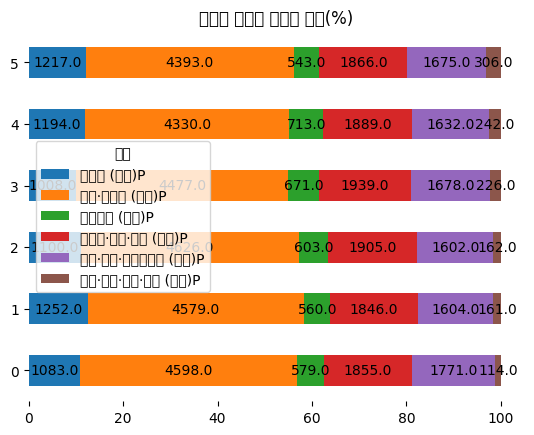

In [ ]:
bar_chart = chart_base.iloc[:, [0, 9, 10, 11, 12, 13, 14]]
bar_chart.info()

ax = bar_chart.plot(kind='barh', stacked=True, title="산업별 외국인 취업자 비중(%)", rot=0)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)
plt.show()